In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs

%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs


def load_data(file_path):
    data = np.loadtxt(file_path, delimiter=',')
    x = data[:, :-1]
    y = data[:, -1]

    return x, y


def visualize_data(features, labels):
    pos_index = np.where(labels == 1)
    neg_index = np.where(labels == 0)

    plt.plot(features[pos_index, 0], features[pos_index, 1], 'b+', )
    plt.plot(features[neg_index, 0], features[neg_index, 1], 'yo',)
    plt.xlabel("Microchip Test 1")
    plt.ylabel("Microchip Test 2")

    plt.show()


def feature_mapping(x1, x2, degree=6):
    if x1.ndim > 0:
        out = [np.ones(shape=x1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((x1 ** (i - j)) * (x2 ** j))

    if x1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_cost(parameters, data, labels, reg_term):
    m = len(labels)
    h_x = sigmoid(np.dot(data, parameters))
    J = np.sum(-labels * np.log(h_x) - (1 - labels) * np.log(1 - h_x)) / m
    J += (reg_term / (2 * m)) * sum(np.square(parameters[1:]))
    return J


def gradient(parameters, data, labels, reg_term):
    m = len(labels)
    h_x = sigmoid(np.dot(data, parameters))
    grads = (1 / m) * (h_x - labels).dot(data)
    grads[1:] += (reg_term / m) * parameters[1:]
    return grads


def visualize_boundary(theta, X, y):
    theta = np.array(theta)

    # Plot Data (remember first column in X is the intercept)
    # visualize_data(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(feature_mapping(ui, vj), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)
    visualize_data(X[:, 1:3], y)
    plt.show()

Cost at initial theta (zeros): 0.6931471805599454
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first 5 values only:
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
Expected Gradients (approx) - first 5 only: 0.0085, 0.0188, 0.0001, 0.0503, 0.0115

Cost at test theta (ones): 3.1645093316150095
Expected cost (approx): 0.693

Gradient at test theta (ones) - first 5 values only:
[0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]
Expected Gradients (approx) - first 5 only: 0.3460, 0.1614, 0.1948, 0.2269, 0.0922



C:\Users\Vijay\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


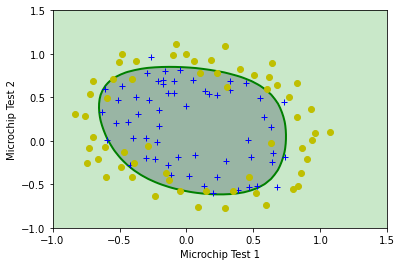

In [3]:
def main():
    file_name = './ex2data2.txt'
    x, y = load_data(file_path=file_name)
    # visualize_data(features=x, labels=y)
    mapped_x = feature_mapping(x1=x[:, 0], x2=x[:, 1])

    init_theta = np.zeros(shape=mapped_x.shape[1])
    regularizer_term = 1
    cost = compute_cost(parameters=init_theta, data=mapped_x, labels=y, reg_term=regularizer_term)
    grad = gradient(parameters=init_theta, data=mapped_x, labels=y, reg_term=regularizer_term)

    print(f"Cost at initial theta (zeros): {cost}")
    print(f"Expected cost (approx): 0.693\n")
    print(f"Gradient at initial theta (zeros) - first 5 values only:\n{grad[:5]}")
    print(f"Expected Gradients (approx) - first 5 only: 0.0085, 0.0188, 0.0001, 0.0503, 0.0115\n")

    # Computing cost and gradient with all-ones theta and regularized term = 10
    test_theta = np.ones(shape=mapped_x.shape[1])
    cost = compute_cost(parameters=test_theta, data=mapped_x, labels=y, reg_term=10)
    grad = gradient(parameters=test_theta, data=mapped_x, labels=y, reg_term=10)

    print(f"Cost at test theta (ones): {cost}")
    print(f"Expected cost (approx): 0.693\n")
    print(f"Gradient at test theta (ones) - first 5 values only:\n{grad[:5]}")
    print(f"Expected Gradients (approx) - first 5 only: 0.3460, 0.1614, 0.1948, 0.2269, 0.0922\n")

    # Optimizing Thetas
    theta, theta_i = fmin_bfgs(compute_cost, init_theta, fprime=gradient, args=(mapped_x, y, regularizer_term), retall=1, disp=0)

    visualize_boundary(theta=theta, X=mapped_x, y=y)


if __name__ == '__main__':
    main()
